In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upi-transactions-2024-dataset/upi_transactions_2024.csv


In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df=pd.read_csv("/kaggle/input/upi-transactions-2024-dataset/upi_transactions_2024.csv")

In [114]:
df.sample(5)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
233055,TXN0000233056,2024-11-15 12:00:05,Recharge,Utilities,6398,SUCCESS,26-35,26-35,Gujarat,Axis,IndusInd,Android,4G,0,12,Friday,0
125528,TXN0000125529,2024-09-23 16:34:24,P2M,Grocery,1854,SUCCESS,18-25,18-25,Rajasthan,SBI,HDFC,iOS,4G,0,16,Monday,0
40266,TXN0000040267,2024-12-09 19:59:24,Bill Payment,Transport,35,SUCCESS,56+,26-35,Uttar Pradesh,Axis,Yes Bank,Android,5G,0,19,Monday,0
85255,TXN0000085256,2024-07-28 19:01:10,P2M,Shopping,7574,SUCCESS,46-55,18-25,Andhra Pradesh,SBI,HDFC,Android,WiFi,0,19,Sunday,1
235998,TXN0000235999,2024-07-06 18:54:59,P2M,Fuel,581,SUCCESS,26-35,36-45,Karnataka,ICICI,Axis,Android,4G,0,18,Saturday,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [116]:
df.shape

(250000, 17)

In [117]:
df["transaction type"].value_counts()

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: count, dtype: int64

In [118]:
df["merchant_category"].value_counts()

merchant_category
Grocery          49966
Food             37464
Shopping         29872
Fuel             25063
Other            24828
Utilities        22338
Transport        20105
Entertainment    20103
Healthcare       12663
Education         7598
Name: count, dtype: int64

In [119]:
df["transaction_status"].value_counts()

transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64

In [120]:
df["sender_age_group"].value_counts()

sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: count, dtype: int64

In [121]:
df["receiver_age_group"].value_counts()

receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: count, dtype: int64

In [122]:
df["sender_state"].value_counts()

sender_state
Maharashtra       37427
Uttar Pradesh     30125
Karnataka         29756
Tamil Nadu        25367
Delhi             24870
Telangana         22435
Gujarat           20061
Andhra Pradesh    20006
Rajasthan         19981
West Bengal       19972
Name: count, dtype: int64

In [123]:
df["sender_bank"].value_counts()

sender_bank
SBI         62693
HDFC        37485
ICICI       29769
IndusInd    25173
Axis        25042
PNB         24946
Yes Bank    24860
Kotak       20032
Name: count, dtype: int64

In [124]:
df["receiver_bank"].value_counts()

receiver_bank
SBI         62378
HDFC        37651
ICICI       29944
IndusInd    25086
Yes Bank    25009
Axis        24992
PNB         24802
Kotak       20138
Name: count, dtype: int64

In [125]:
df["device_type"].value_counts()

device_type
Android    187777
iOS         49613
Web         12610
Name: count, dtype: int64

In [126]:
df["network_type"].value_counts()

network_type
4G      149813
5G       62582
WiFi     25134
3G       12471
Name: count, dtype: int64

In [127]:
df["fraud_flag"].value_counts()

fraud_flag
0    249520
1       480
Name: count, dtype: int64

In [128]:
df["hour_of_day"].value_counts()

hour_of_day
19    21232
18    20064
20    18506
17    18340
12    17516
11    16328
21    16253
13    15038
16    13992
10    13904
15    12624
14    11472
9     10450
22     9364
8      8349
23     5817
7      5630
6      3501
0      3388
1      2244
5      1742
2      1685
3      1314
4      1247
Name: count, dtype: int64

In [129]:
df["day_of_week"].value_counts()

day_of_week
Monday       36495
Sunday       36003
Wednesday    35700
Tuesday      35540
Friday       35496
Thursday     35432
Saturday     35334
Name: count, dtype: int64

In [130]:
df["is_weekend"].value_counts()

is_weekend
0    178663
1     71337
Name: count, dtype: int64

In [131]:
df["amount (INR)"].value_counts()

amount (INR)
215      311
203      307
174      302
197      296
227      296
        ... 
11904      1
28690      1
10823      1
6990       1
9505       1
Name: count, Length: 10355, dtype: int64

In [132]:
df.describe()

,amount (INR),fraud_flag,hour_of_day,is_weekend
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,1311.756036,0.001920,14.681032,0.285348
std,1848.059224,0.043776,5.188304,0.451581
min,10.000000,0.000000,0.000000,0.000000
25%,288.000000,0.000000,11.000000,0.000000
50%,629.000000,0.000000,15.000000,0.000000
75%,1596.000000,0.000000,19.000000,1.000000
max,42099.000000,1.000000,23.000000,1.000000


In [133]:
print(df.duplicated().sum())

0


In [134]:
df["timestamp"]=pd.to_datetime(df["timestamp"])
df["month"]=df["timestamp"].dt.month
df["date"]=df["timestamp"].dt.date
df["week"]=df["timestamp"].dt.isocalendar().week


Text(0.5, 1.0, 'Transaction Status Distribution')

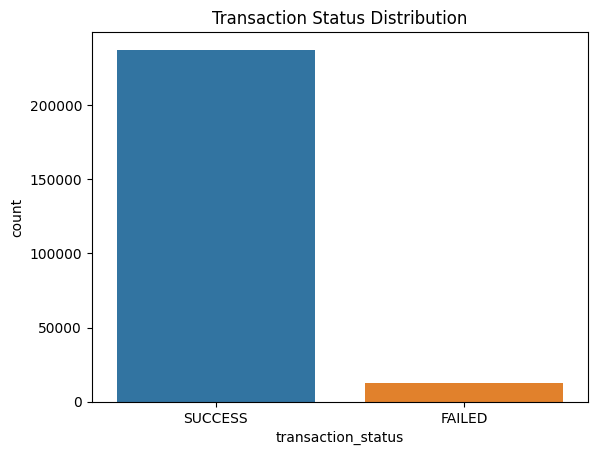

In [135]:
# Transaction status distribution
sns.countplot(data=df, x='transaction_status')
plt.title('Transaction Status Distribution')

Text(0.5, 1.0, 'Fraud Flag Distribution')

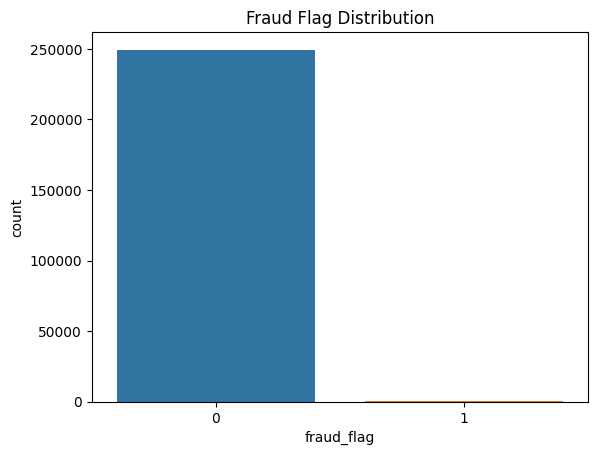

In [136]:
# Fraud Flag
sns.countplot(data=df, x='fraud_flag')
plt.title('Fraud Flag Distribution')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'P2P'),
  Text(1, 0, 'P2M'),
  Text(2, 0, 'Bill Payment'),
  Text(3, 0, 'Recharge')])

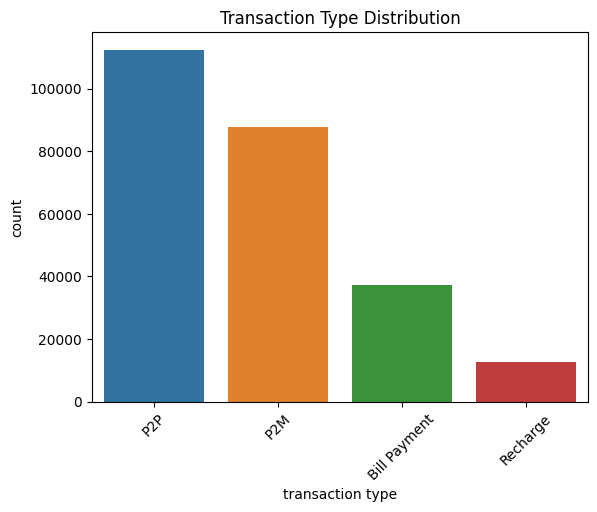

In [137]:
sns.countplot(data=df, x='transaction type', order=df['transaction type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)


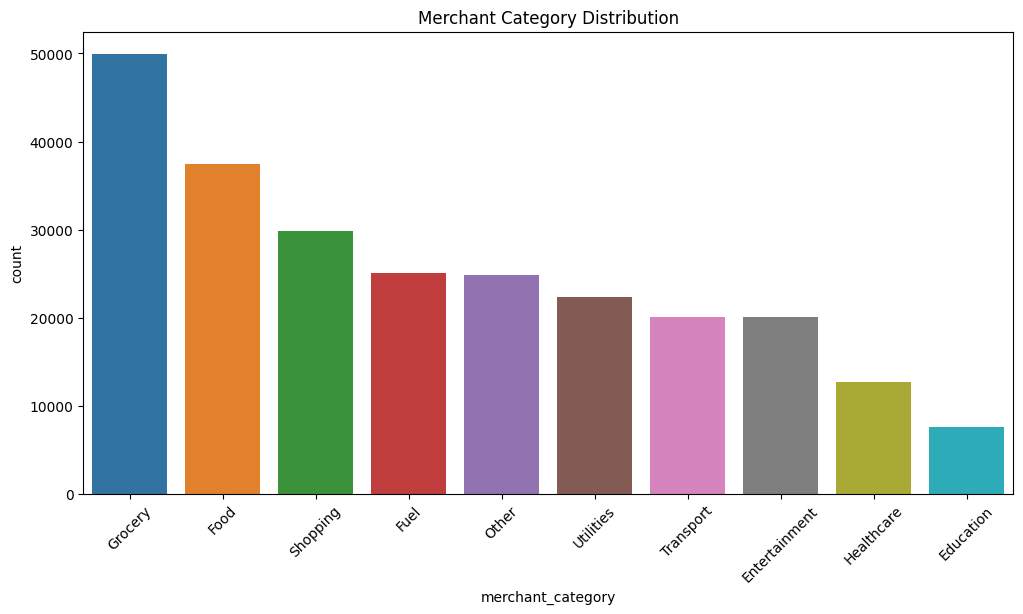

In [138]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='merchant_category', order=df['merchant_category'].value_counts().index)
plt.title('Merchant Category Distribution')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


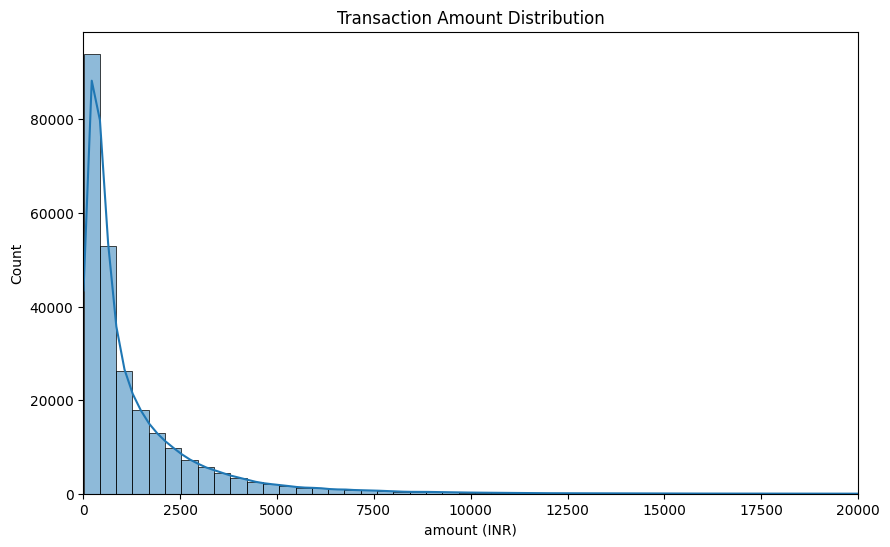

In [139]:
# Amount distribution
plt.figure(figsize=(10,6))
sns.histplot(df['amount (INR)'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlim(0, 20000)
plt.show()

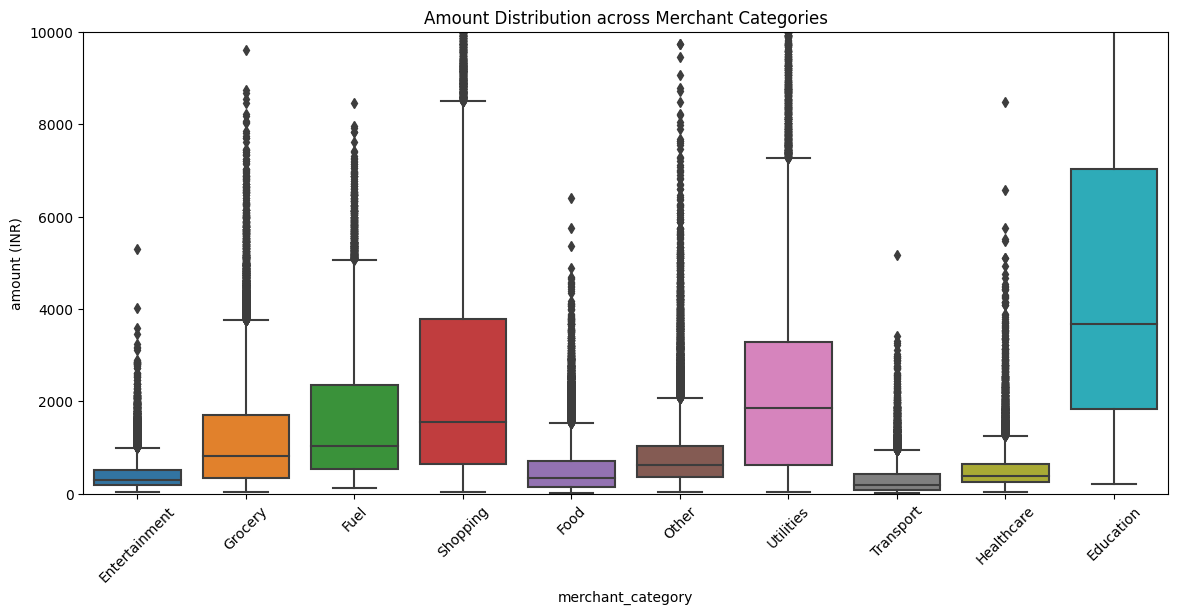

In [140]:
# Amount vs Merchant Category
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='merchant_category', y='amount (INR)')
plt.title('Amount Distribution across Merchant Categories')
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

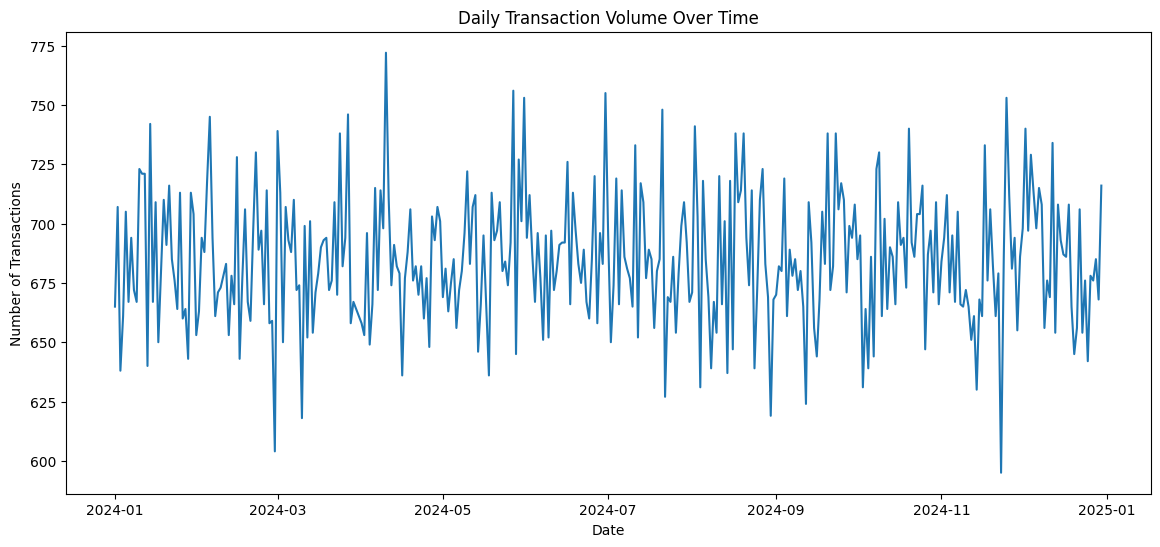

In [141]:
# Daily transaction volume
daily_txn = df.groupby('date').size()

plt.figure(figsize=(14,6))
daily_txn.plot()
plt.title('Daily Transaction Volume Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Date')
plt.show()


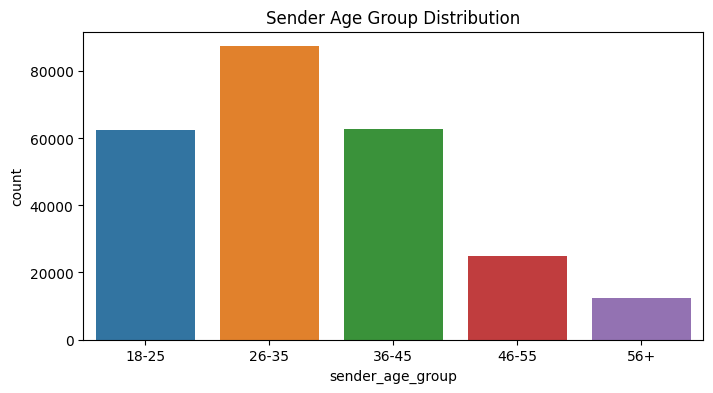

In [142]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='sender_age_group', order=['18-25','26-35','36-45','46-55','56+'])
plt.title('Sender Age Group Distribution')
plt.show()


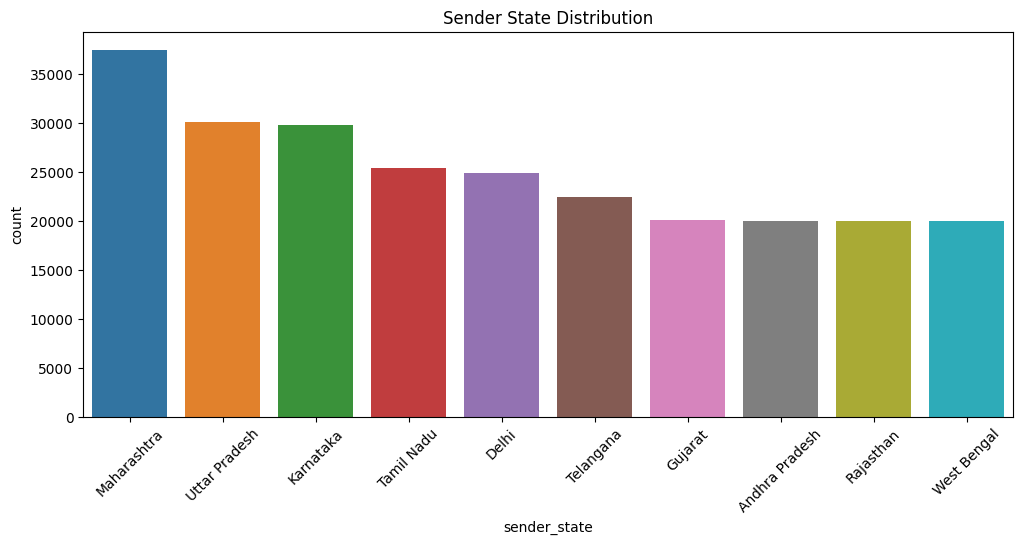

In [143]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='sender_state', order=df['sender_state'].value_counts().index)
plt.title('Sender State Distribution')
plt.xticks(rotation=45)
plt.show()


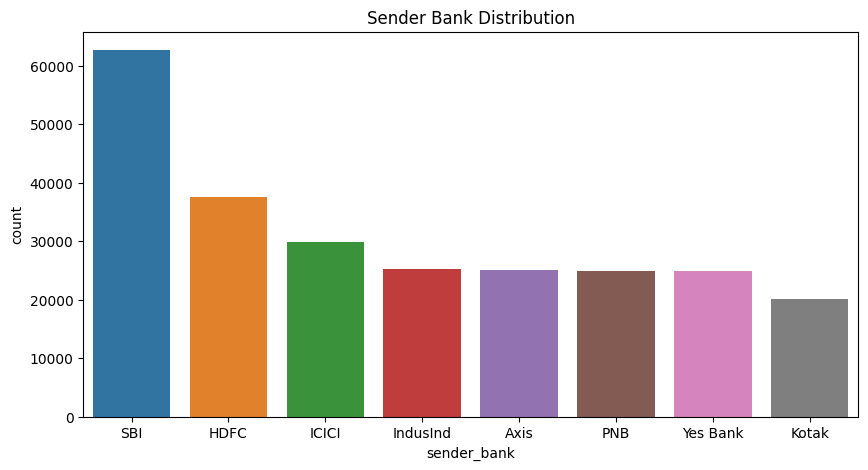

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sender_bank', order=df['sender_bank'].value_counts().index)
plt.title('Sender Bank Distribution')
plt.show()


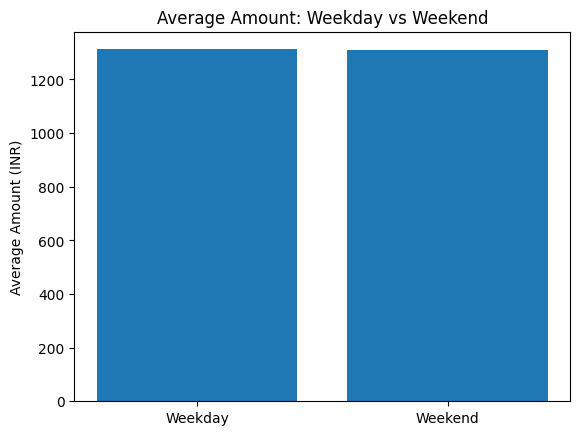

In [145]:
weekend_avg = df.groupby('is_weekend')['amount (INR)'].mean()

plt.bar(['Weekday','Weekend'], weekend_avg)
plt.title("Average Amount: Weekday vs Weekend")
plt.ylabel("Average Amount (INR)")
plt.show()


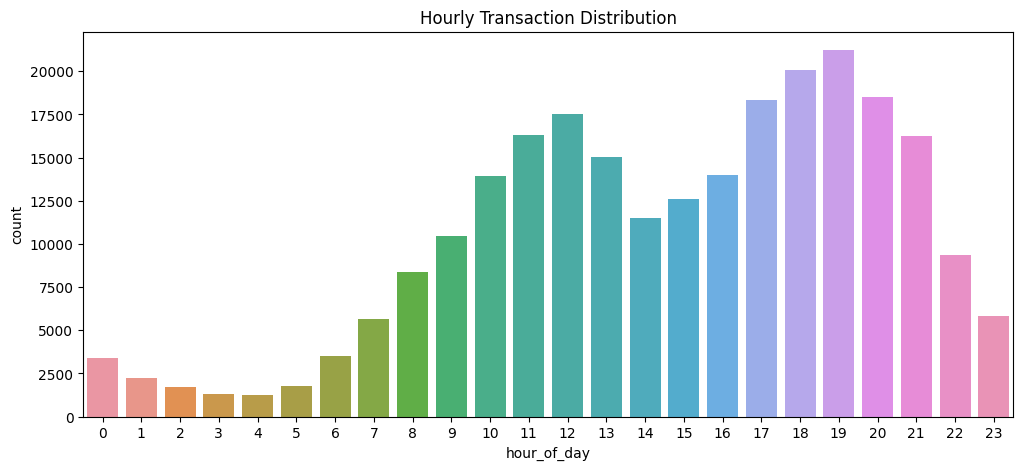

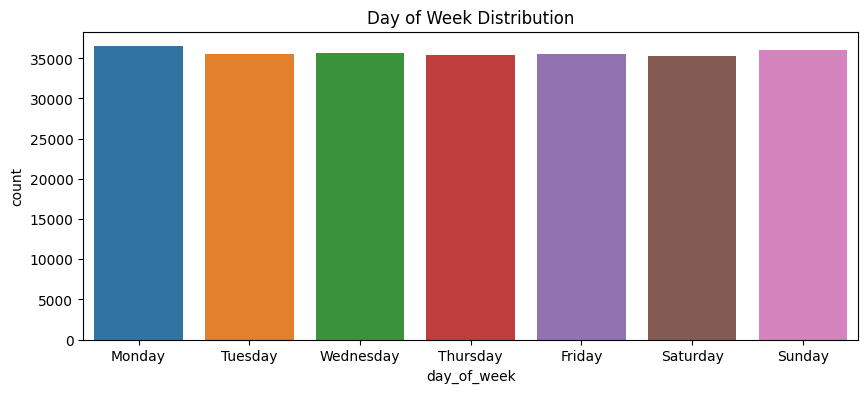

In [146]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='hour_of_day')
plt.title('Hourly Transaction Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Day of Week Distribution')
plt.show()


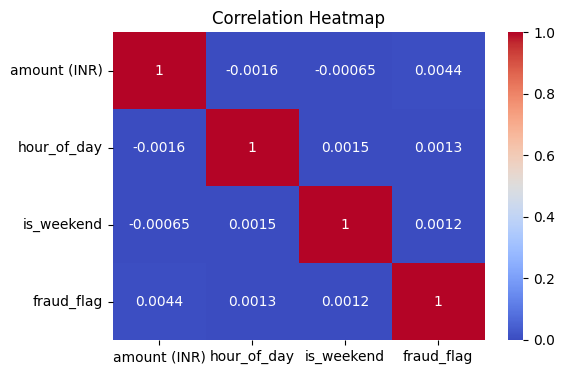

In [147]:
corr = df[['amount (INR)', 'hour_of_day', 'is_weekend', 'fraud_flag']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


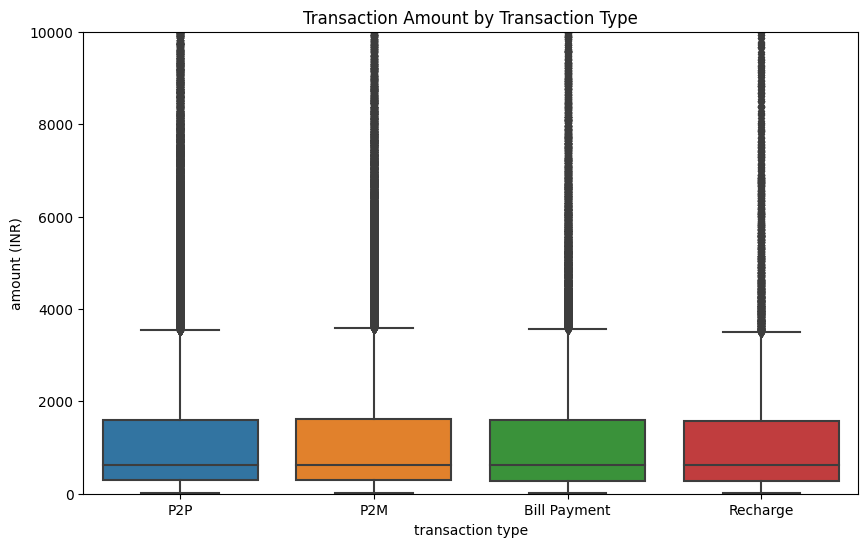

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transaction type', y='amount (INR)')
plt.title('Transaction Amount by Transaction Type')
plt.ylim(0, 10000)  # Zoom in to avoid distortion from outliers
plt.show()


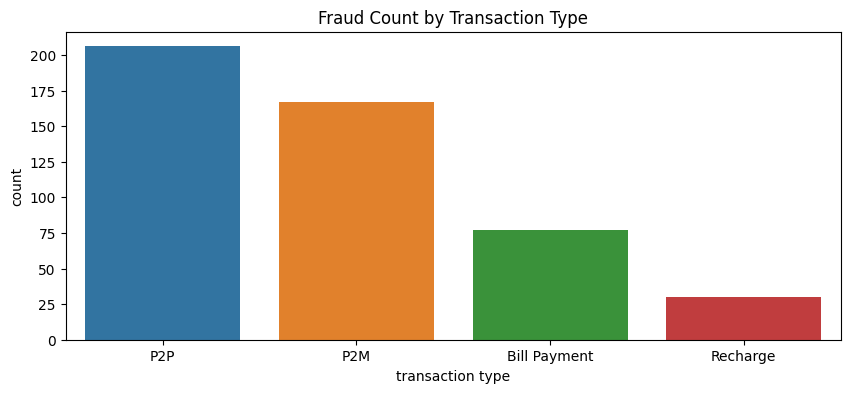

In [149]:
# Fraud count by transaction type
plt.figure(figsize=(10, 4))
sns.countplot(data=df[df['fraud_flag']==1], x='transaction type', order=df['transaction type'].value_counts().index)
plt.title('Fraud Count by Transaction Type')
plt.show()

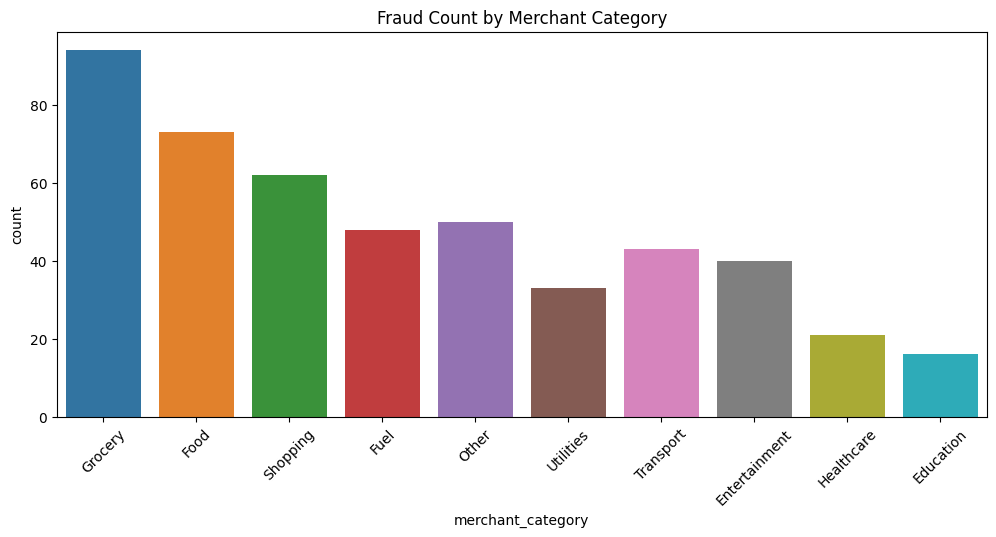

In [150]:
# Fraud count by merchant category
plt.figure(figsize=(12, 5))
sns.countplot(data=df[df['fraud_flag']==1], x='merchant_category', order=df['merchant_category'].value_counts().index)
plt.title('Fraud Count by Merchant Category')
plt.xticks(rotation=45)
plt.show()

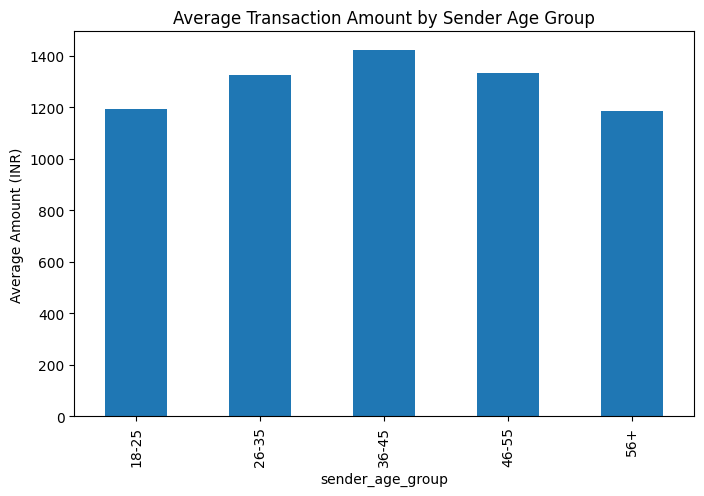

In [151]:
avg_amount_age = df.groupby('sender_age_group')['amount (INR)'].mean().sort_index()

plt.figure(figsize=(8,5))
avg_amount_age.plot(kind='bar')
plt.title('Average Transaction Amount by Sender Age Group')
plt.ylabel('Average Amount (INR)')
plt.show()


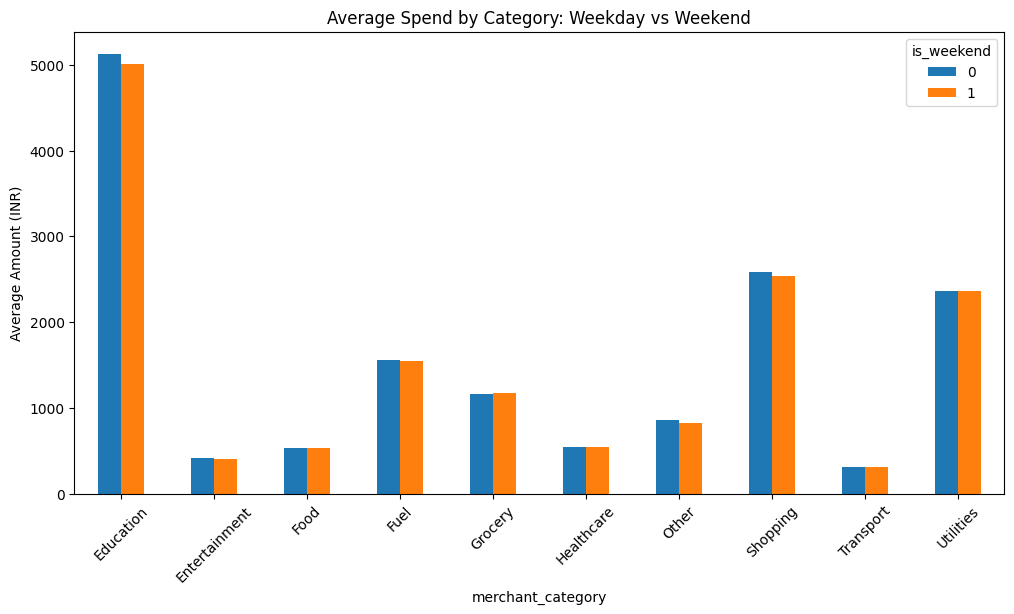

In [152]:
weekend_spend = df.groupby(['is_weekend', 'merchant_category'])['amount (INR)'].mean().unstack()

weekend_spend.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Spend by Category: Weekday vs Weekend")
plt.ylabel("Average Amount (INR)")
plt.xticks(rotation=45)
plt.show()


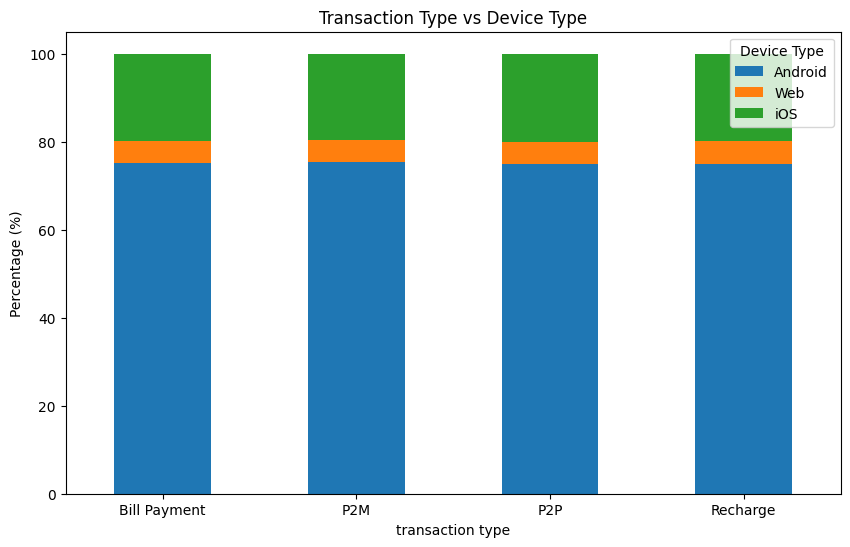

In [153]:
cross_tab = pd.crosstab(df['transaction type'], df['device_type'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Transaction Type vs Device Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Device Type')
plt.show()


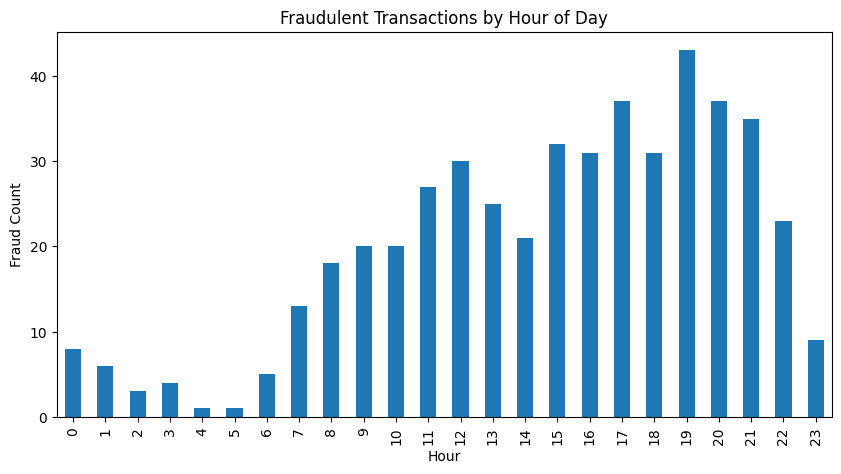

In [154]:
fraud_by_hour = df[df['fraud_flag'] == 1]['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,5))
fraud_by_hour.plot(kind='bar')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.show()


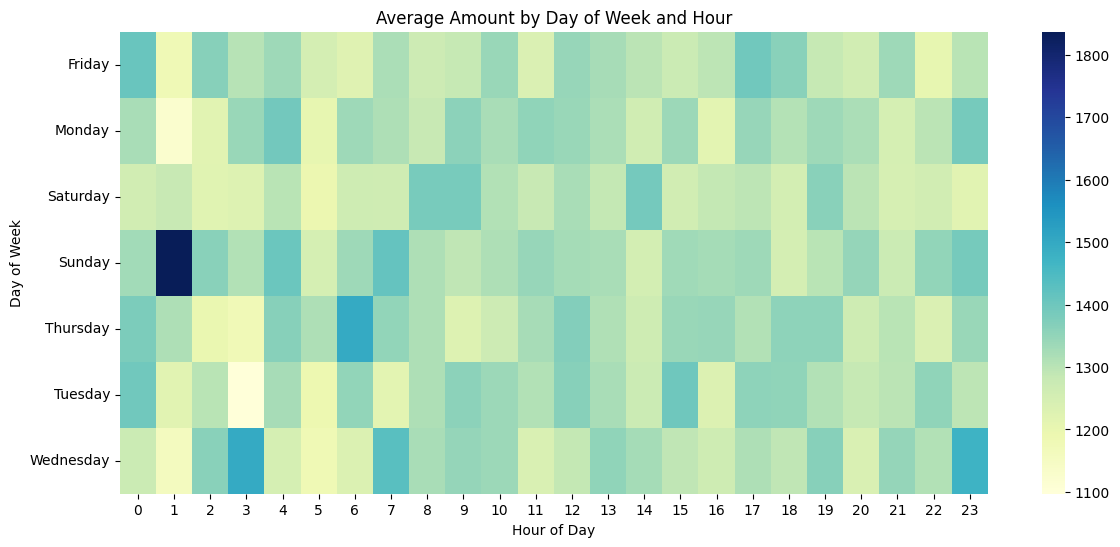

In [155]:
pivot = df.pivot_table(values='amount (INR)', index='day_of_week', columns='hour_of_day', aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Average Amount by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


In [156]:
# Detect top 1% highest-value transactions
threshold = df['amount (INR)'].quantile(0.99)
outliers = df[df['amount (INR)'] > threshold]
print("Top 1% high-value transactions:", outliers.shape[0])


Top 1% high-value transactions: 2500


**or you can run just two line code for ExploratorY Data Analysis**

In [157]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="UPI Transactions EDA Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:11<00:00,  1.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

now we'll apply feature engineering

In [158]:
df.drop(['transaction id'], axis=1, inplace=True)

# as this is of no use

In [159]:
df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if (x >= 0 and x <= 5) else 0)
df['is_peak_hour'] = df['hour_of_day'].apply(lambda x: 1 if (x >= 17 and x <= 21) else 0)

In [160]:
df['transaction type'] = df['transaction type'].map({
    'P2P': 0,
    'P2M': 1,
    'Bill Payment': 2,
    'Recharge': 3
})


# transaction type to numeric form

In [161]:
df = pd.get_dummies(df, columns=['merchant_category'], prefix='merchant', dtype=int)

# One Hot Encoding on mechant category

In [162]:
# Label Encoding example:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['sender_bank', 'receiver_bank', 'device_type', 'network_type', 'sender_state']

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# label concoding

In [163]:
age_map = {'18-25': 0, '26-35': 1, '36-45': 2, '46-55': 3, '56+': 4}
df['sender_age_group'] = df['sender_age_group'].map(age_map)
df['receiver_age_group'] = df['receiver_age_group'].map(age_map)


In [164]:
import numpy as np
df['log_amount'] = np.log1p(df['amount (INR)'])

# data was rightly skewed so to make it normal we'll apply log tranformation

In [165]:
df.drop(['timestamp', 'amount (INR)'], axis=1, inplace=True)

# highly correlated columns are of no use

In [166]:
df.sample(2)

,transaction type,transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,...,merchant_Entertainment,merchant_Food,merchant_Fuel,merchant_Grocery,merchant_Healthcare,merchant_Other,merchant_Shopping,merchant_Transport,merchant_Utilities,log_amount
104707,0,SUCCESS,2,2,3,5,6,0,0,0,...,0,0,1,0,0,0,0,0,0,6.228511
105002,0,SUCCESS,2,0,3,6,6,0,0,0,...,0,0,0,0,0,0,1,0,0,8.524169


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction type        250000 non-null  int64  
 1   transaction_status      250000 non-null  object 
 2   sender_age_group        250000 non-null  int64  
 3   receiver_age_group      250000 non-null  int64  
 4   sender_state            250000 non-null  int64  
 5   sender_bank             250000 non-null  int64  
 6   receiver_bank           250000 non-null  int64  
 7   device_type             250000 non-null  int64  
 8   network_type            250000 non-null  int64  
 9   fraud_flag              250000 non-null  int64  
 10  hour_of_day             250000 non-null  int64  
 11  day_of_week             250000 non-null  object 
 12  is_weekend              250000 non-null  int64  
 13  month                   250000 non-null  int32  
 14  date                

In [168]:
df["date"].value_counts()

date
2024-04-10    772
2024-05-27    756
2024-06-30    755
2024-11-25    753
2024-05-31    753
             ... 
2024-09-12    624
2024-08-30    619
2024-03-10    618
2024-02-29    604
2024-11-23    595
Name: count, Length: 365, dtype: int64

In [169]:
df["week"].value_counts()

week
1     5453
49    5000
22    4988
15    4942
39    4935
2     4886
48    4879
42    4859
26    4857
12    4852
24    4850
34    4845
43    4836
28    4834
5     4833
44    4833
21    4829
3     4823
29    4820
33    4816
19    4816
31    4814
41    4814
8     4805
6     4805
27    4804
36    4794
38    4792
25    4790
50    4790
18    4781
13    4772
10    4762
51    4753
32    4752
7     4751
11    4746
16    4744
35    4742
45    4741
9     4737
20    4733
17    4733
23    4725
14    4709
40    4708
4     4705
37    4698
47    4685
30    4681
52    4679
46    4669
Name: count, dtype: Int64

In [171]:
df["transaction_status"].value_counts()

transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64

In [173]:
df['transaction_status'] = df['transaction_status'].map({'SUCCESS': 1, 'FAILED': 0})

In [172]:
df["day_of_week"].value_counts()

day_of_week
Monday       36495
Sunday       36003
Wednesday    35700
Tuesday      35540
Friday       35496
Thursday     35432
Saturday     35334
Name: count, dtype: int64

In [174]:
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week'] = df['day_of_week'].map(day_map)


In [175]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_month'] = df['date'].dt.day
df['week_of_year'] = df['date'].dt.isocalendar().week


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction type        250000 non-null  int64         
 1   transaction_status      250000 non-null  int64         
 2   sender_age_group        250000 non-null  int64         
 3   receiver_age_group      250000 non-null  int64         
 4   sender_state            250000 non-null  int64         
 5   sender_bank             250000 non-null  int64         
 6   receiver_bank           250000 non-null  int64         
 7   device_type             250000 non-null  int64         
 8   network_type            250000 non-null  int64         
 9   fraud_flag              250000 non-null  int64         
 10  hour_of_day             250000 non-null  int64         
 11  day_of_week             250000 non-null  int64         
 12  is_weekend              250000

Dataset Overview
Total Transactions: ~250,000

Period Covered: January 2024 to December 2024

Data Type: Synthetic, highly realistic UPI transactions generated for fraud detection, behavioral analysis, and business insights.

Coverage: Transaction type, amount, timestamp, fraud flag, demographics, devices, banks, and network types.

Transaction Performance
Success Rate: 95% of transactions are successful.
Failure Rate: 5% failure observed.
Observation: High system reliability with minimal transaction failures.

Fraud Analysis

Fraud Rate: 
Approximately 0.2% of total transactions.
Fraud Distribution by Transaction Type:

Highest in P2P (Person-to-Person)
Moderate in P2M (Person-to-Merchant)
Lowest in Recharge transactions

Fraud Distribution by Merchant Category:
Highest fraud in Grocery > Food > Shopping > Fuel
Lowest fraud in Education and Healthcare

Fraud Time Window:
Fraud peaks between 18:00–21:00 (evening hours).
Minimal fraud activity during 2 AM – 6 AM.

Transaction Amount Insights

Distribution: Highly right-skewed.

Median Transaction Amount: ₹500 – ₹800.

Top 1% High-Value Transactions: Threshold approximately ₹2,500.

Application: High-value transactions can be flagged for enhanced verification.

User Demographics

Top Age Group by Volume: 26–35 (35% share)

Top Age Group by Spending: 36–45 age group spends the most on average.

Lowest Spending Groups: 18–25 and 56+.

Device & Network Usage

Device Type Share:

Android dominates (~75% of transactions)

iOS is second-most used

Web usage minimal


Network Type Share:

Majority on 4G and 5G networks.

Very low usage of WiFi or 3G.

Temporal Behavior
Day of Week:

Activity fairly uniform across weekdays.

Slightly higher transactions on Monday and Sunday.


Hour of Day:

Peak transaction time between 6 PM – 9 PM.

Low activity during late night/early morning.


Seasonality:

No major seasonal trends observed — stable transaction volume throughout the year.

Bank & State Distribution

Top Banks:

SBI (25%)

HDFC

ICICI


Top States:

Maharashtra

Uttar Pradesh

Karnataka

Tamil Nadu



Overall Business Takeaways
UPI usage reflects realistic customer behavior with strong peer-to-peer adoption.

Fraud is rare but highly concentrated in certain transaction types, categories, and time windows.

Middle-aged users and Android devices dominate transaction volume and value.

The dataset is highly suitable for:

Business intelligence reporting

Fraud pattern analysis

User segmentation studies

Policy or product-level operational improvements
